In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Modul 2: Data Analysis**
# Data Visualization with Python

1. https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline


## __Dataset titanic seaborn__

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **No.1**

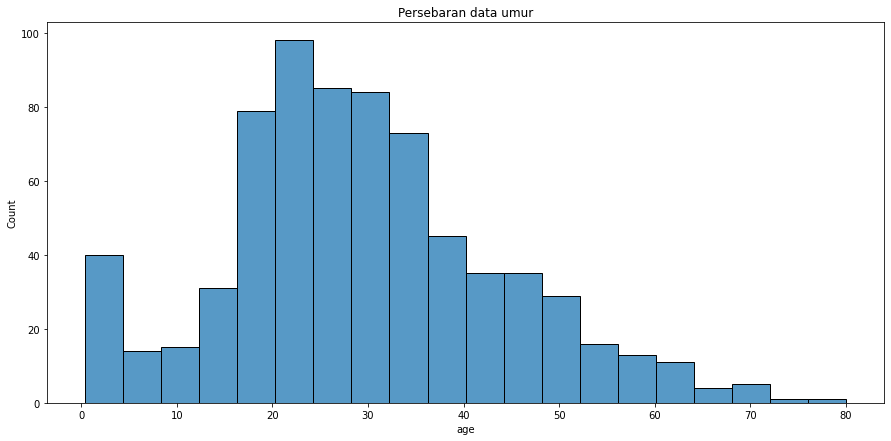

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(df['age'])
plt.title('Persebaran data umur');

# **No.2**

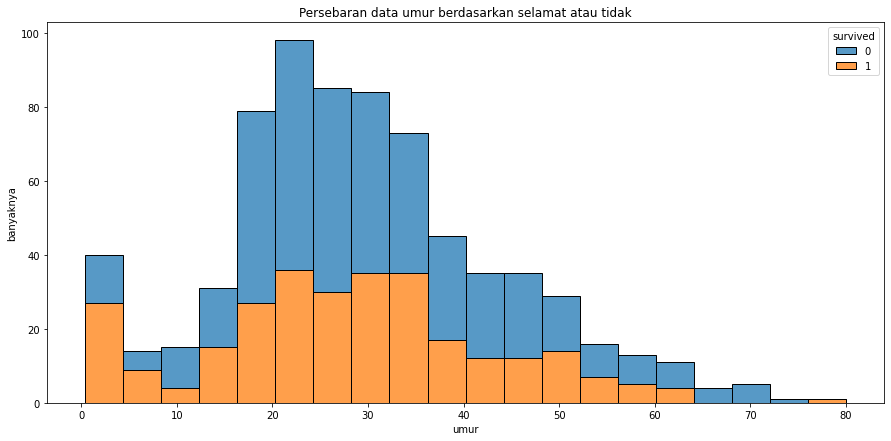

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data=df, x='age', hue='survived', multiple="stack")
plt.title('Persebaran data umur berdasarkan selamat atau tidak')
plt.xlabel('umur')
plt.ylabel('banyaknya');

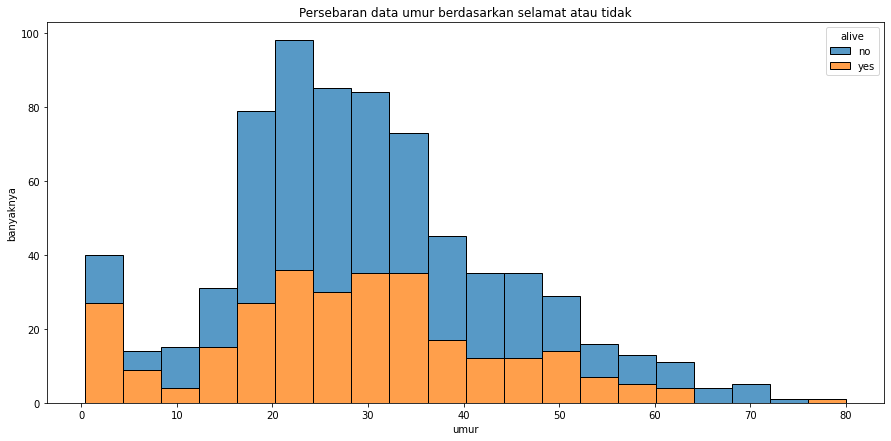

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(data=df, x='age', hue='alive', multiple="stack")
plt.title('Persebaran data umur berdasarkan selamat atau tidak')
plt.xlabel('umur')
plt.ylabel('banyaknya');

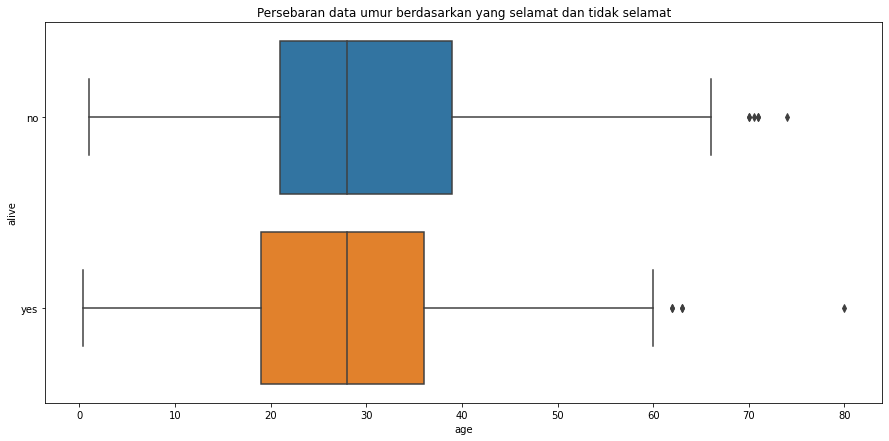

In [ ]:
plt.figure(figsize = (15,7))
sns.boxplot(data=df, x='age', y='alive')
plt.title('Persebaran data umur berdasarkan yang selamat dan tidak selamat');

# **No.3**

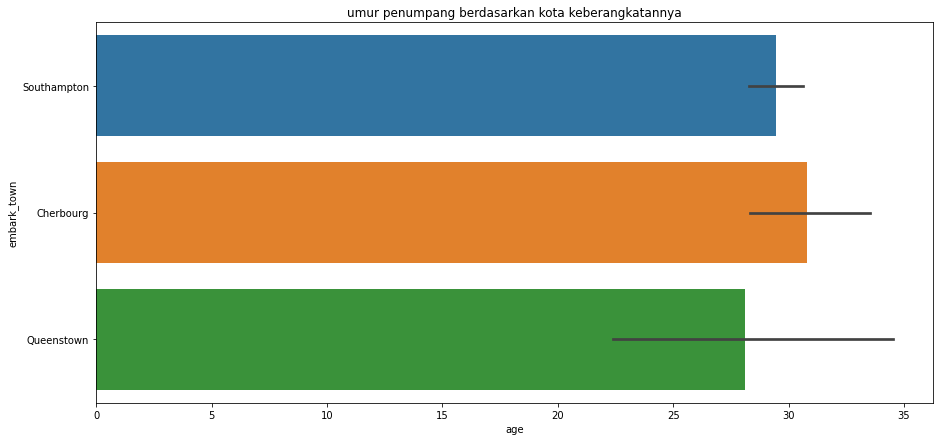

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x='age', y='embark_town', estimator=np.mean)
plt.title('umur penumpang berdasarkan kota keberangkatannya')
plt.show()

In [ ]:
df_embark = df[['embark_town','age']].groupby(['embark_town'], as_index=False).mean()
df_embark

,embark_town,age
0,Cherbourg,30.814769
1,Queenstown,28.089286
2,Southampton,29.445397


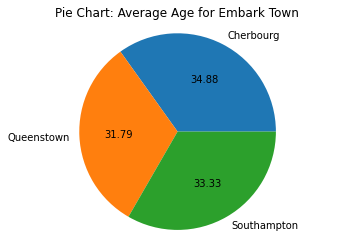

In [ ]:
plt.pie(df_embark['age'], labels=df_embark['embark_town'], autopct='%.2f')
plt.title('Pie Chart: Average Age for Embark Town')
plt.axis('equal')
plt.show()

# **No.4**

In [ ]:
df_class = df['class'].value_counts().reset_index().rename(columns={'index':'class','class':'count'})
df_class

,class,count
0,Third,491
1,First,216
2,Second,184


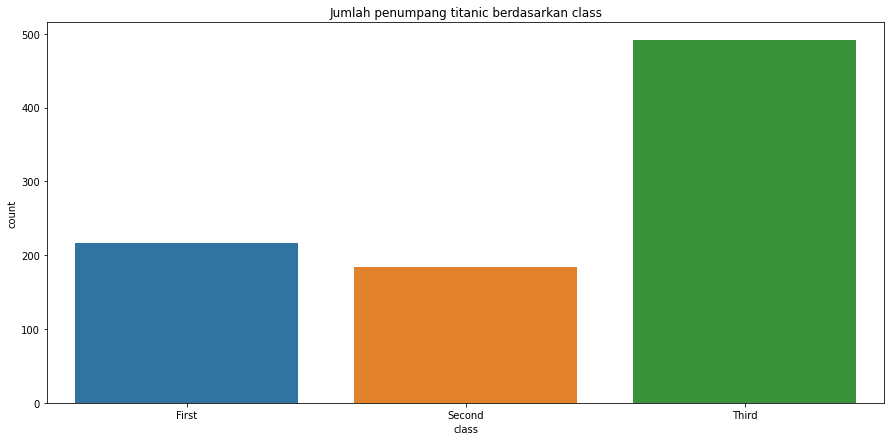

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_class, x='class', y='count')
plt.title('Jumlah penumpang titanic berdasarkan class');

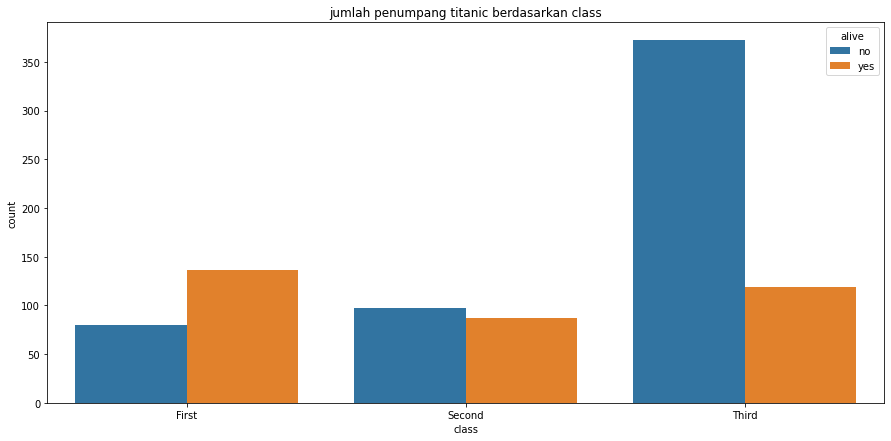

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data=df, x='class', hue='alive')
plt.title('jumlah penumpang titanic berdasarkan class');

# **No.5**

In [ ]:
df_alive = df['alive'].value_counts().reset_index().rename(columns={'index':'alive','alive':'count'})
df_alive

,alive,count
0,no,549
1,yes,342


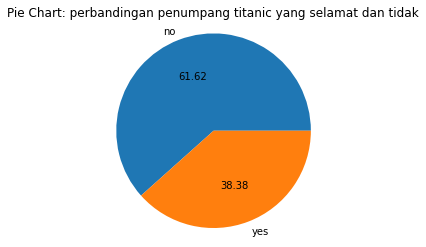

In [ ]:
plt.pie(df_alive['count'], labels=df_alive['alive'], autopct='%.2f')
plt.title('Pie Chart: perbandingan penumpang titanic yang selamat dan tidak')
plt.axis('equal')
plt.show()

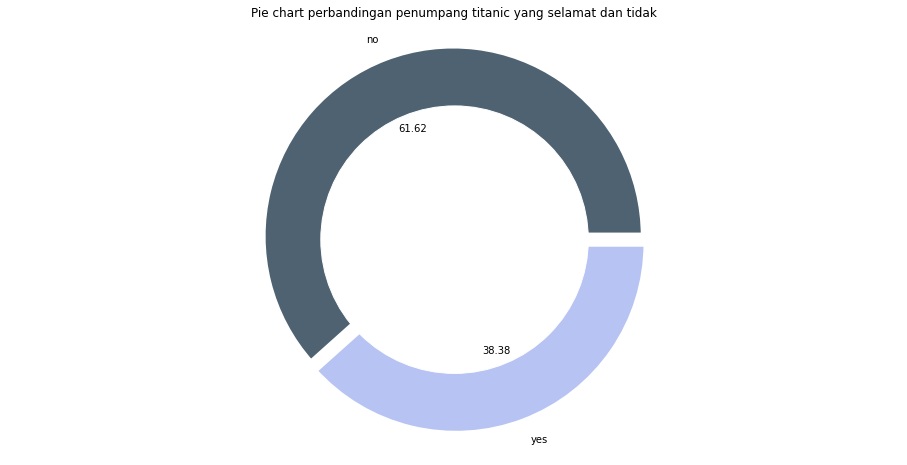

In [ ]:
colors = ['#4F6272', '#B7C3F3']
plt.figure(figsize=(16,8))
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(df_alive['count'],
        labels= df_alive['alive'],
        autopct = '%.2f',
        labeldistance = 1.1,
        colors=colors,
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },
        explode = (0.02, 0.02))
plt.axis('equal')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Pie chart perbandingan penumpang titanic yang selamat dan tidak')
plt.savefig('piechart.pdf')
plt.show()

# **No.6**

In [ ]:
corr = df[['age','fare','pclass','survived']].corr()
corr

,age,fare,pclass,survived
age,1.000000,0.096067,-0.369226,-0.077221
fare,0.096067,1.000000,-0.549500,0.257307
pclass,-0.369226,-0.549500,1.000000,-0.338481
survived,-0.077221,0.257307,-0.338481,1.000000


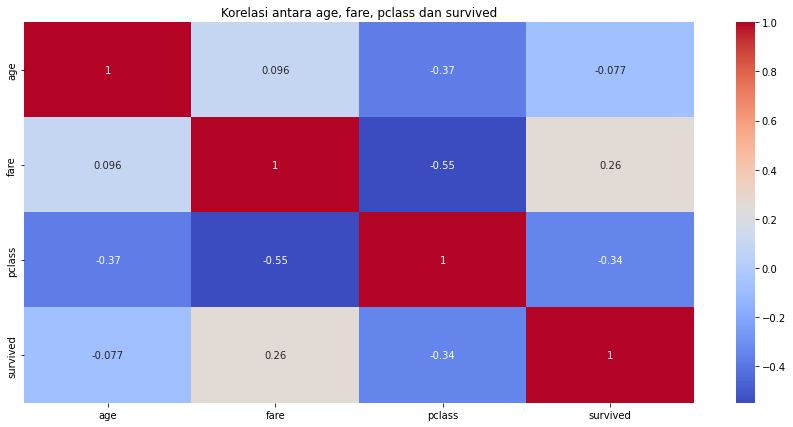

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antara age, fare, pclass dan survived');

# **No.7**

In [ ]:
df_flight = sns.load_dataset('flights')
df_flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


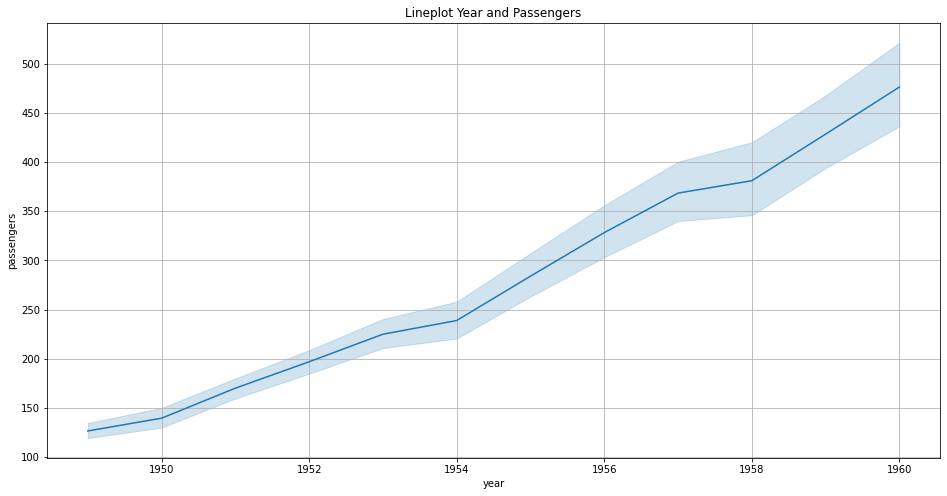

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_flight, x='year', y='passengers')
plt.grid(True)
plt.title('Lineplot Year and Passengers');

## __Dataset melb_data.csv__

In [ ]:
# scroll horizontal
# pd.set_option('display.max_columns', 100)

# read csv
df = pd.read_csv('/content/drive/MyDrive/JCDSVL-04, 06, 07, JCDSAHLS-01 Practice Session/Modul 2/Week 4/Tuesday, August 30, 2022/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.shape

(13580, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


1. https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [ ]:
# runtime configuration (rc)

# style
sns.set_style("darkgrid")

# figure size (ukuran canvas)
plt.rcParams["figure.figsize"] = (14,6)

# font size
small = 14
medium = 16
large = 18

plt.rc('font', size = small)          # controls default text sizes
plt.rc('axes', titlesize = small)     # fontsize of the axes title
plt.rc('axes', labelsize = medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = small)    # fontsize of the tick labels
plt.rc('ytick', labelsize = small)    # fontsize of the tick labels
plt.rc('legend', fontsize = small)    # legend fontsize
plt.rc('figure', titlesize = large)   # fontsize of the figure title


# **No.1**

# Tampilkan visualisasi yang menunjukkan persebaran harga rumah secara keseluruhan!

1. https://seaborn.pydata.org/generated/seaborn.distplot.html
1. https://seaborn.pydata.org/generated/seaborn.histplot.html

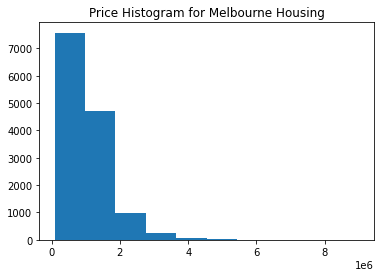

In [ ]:
plt.hist(df['Price'])
plt.title('Price Histogram for Melbourne Housing')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


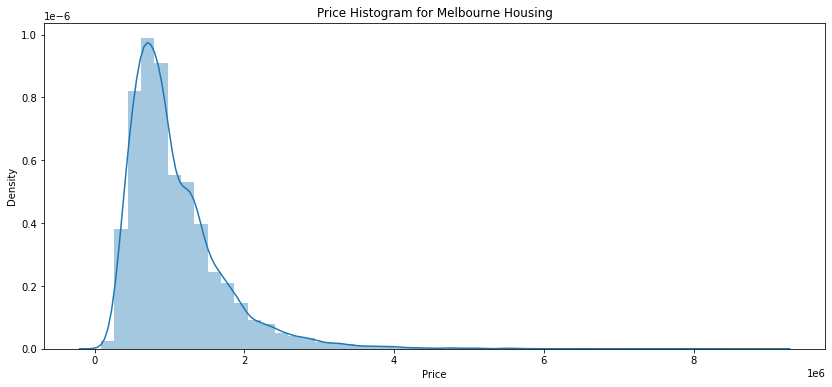

In [ ]:
# No.1
plt.figure(figsize=(14,6))
sns.distplot(df['Price'])
plt.title('Price Histogram for Melbourne Housing')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


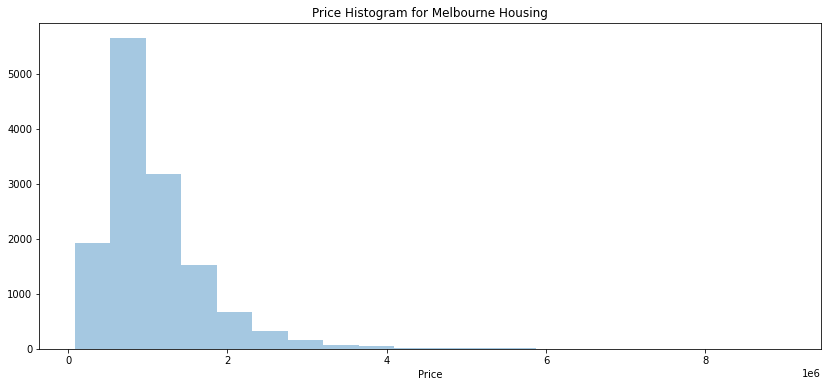

In [ ]:
plt.figure(figsize=(14,6))
sns.distplot(df['Price'], bins=20 , kde=False)
plt.title('Price Histogram for Melbourne Housing')
plt.show()

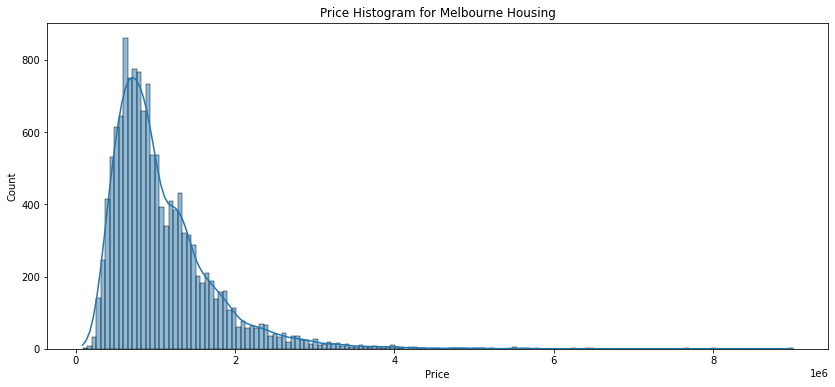

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x="Price", kde=True)
plt.title('Price Histogram for Melbourne Housing')
plt.show()


In [ ]:
x_tick = np.linspace(0,9000000,21)
x_tick

array([      0.,  450000.,  900000., 1350000., 1800000., 2250000.,
       2700000., 3150000., 3600000., 4050000., 4500000., 4950000.,
       5400000., 5850000., 6300000., 6750000., 7200000., 7650000.,
       8100000., 8550000., 9000000.])

In [ ]:
y_tick = np.arange(0,6001, 500)
y_tick

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
       5500, 6000])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


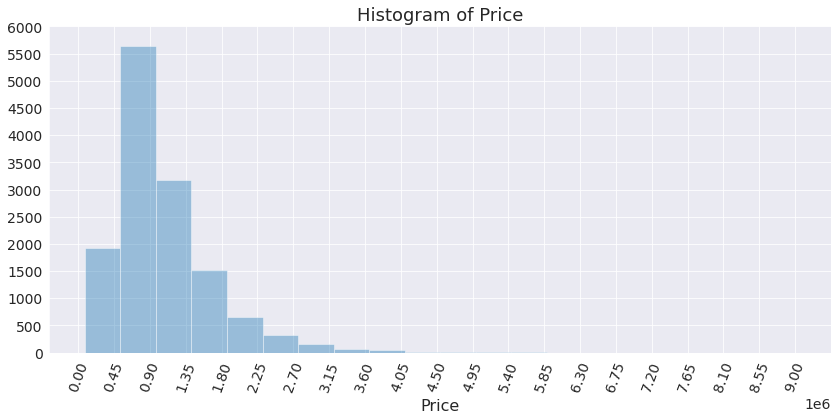

In [ ]:
# untuk batas tiap bin
x_tick = np.linspace(0,9000000,21)
y_tick = np.arange(0,6001, 500)

# distplot
plt.figure(figsize=(14,6))

ax = sns.distplot(df['Price'], bins=20 , kde=False)
ax.set_xticks(x_tick)
ax.set_yticks(y_tick)

plt.title('Histogram of Price', fontdict={'size':18})
plt.xticks(rotation=70)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


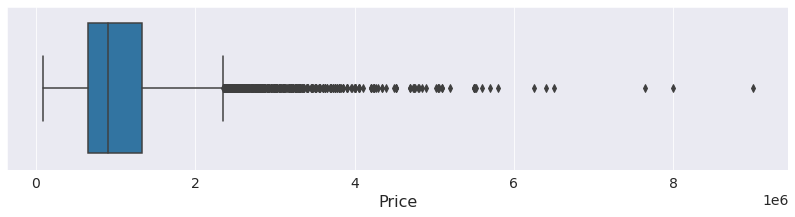

In [ ]:
plt.figure(figsize=(14,3))
sns.boxplot(df['Price']);

In [ ]:
df.describe()[['Price']].tail()

,Price
min,85000.0
25%,650000.0
50%,903000.0
75%,1330000.0
max,9000000.0


In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# **No.2**

# Tampilkan visualisasi rata-rata harga rumah berdasarkan Region Name!

1. https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
price_by_region = df[['Price', 'Regionname']].groupby(['Regionname']).mean()
price_by_region

,Price
Regionname,
Eastern Metropolitan,1.104080e+06
Eastern Victoria,6.999808e+05
Northern Metropolitan,8.981711e+05
Northern Victoria,5.948293e+05
South-Eastern Metropolitan,9.229438e+05
Southern Metropolitan,1.372963e+06
Western Metropolitan,8.664205e+05
Western Victoria,3.975234e+05


In [ ]:
x = df['Regionname'].unique().tolist()
x

['Northern Metropolitan',
 'Western Metropolitan',
 'Southern Metropolitan',
 'Eastern Metropolitan',
 'South-Eastern Metropolitan',
 'Eastern Victoria',
 'Northern Victoria',
 'Western Victoria']

In [ ]:
y = price_by_region['Price']
y

Regionname
Eastern Metropolitan          1.104080e+06
Eastern Victoria              6.999808e+05
Northern Metropolitan         8.981711e+05
Northern Victoria             5.948293e+05
South-Eastern Metropolitan    9.229438e+05
Southern Metropolitan         1.372963e+06
Western Metropolitan          8.664205e+05
Western Victoria              3.975234e+05
Name: Price, dtype: float64

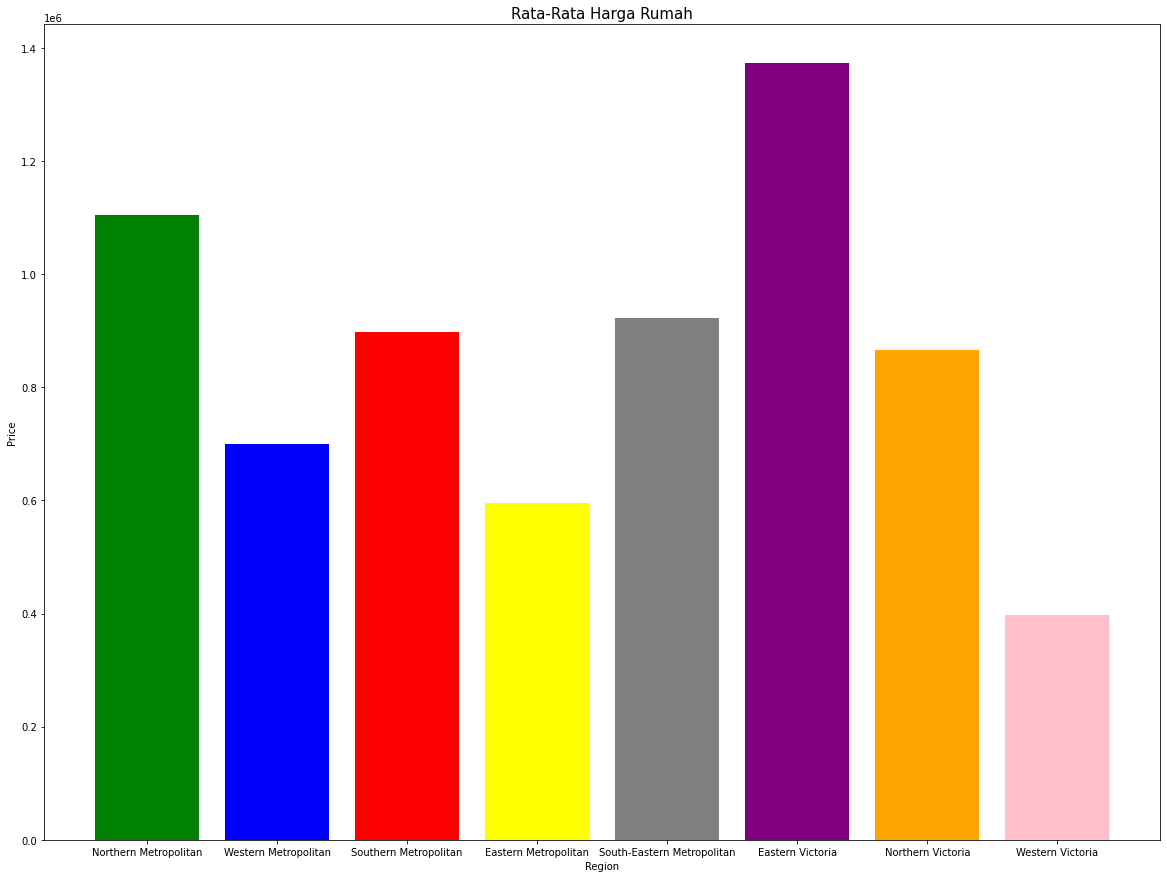

In [ ]:
price_by_region = df[['Price', 'Regionname']].groupby(['Regionname']).mean()

x = df['Regionname'].unique().tolist()
y = price_by_region['Price']

plt.figure(figsize = (20,15))
plt.bar(x, y, color=['green', 'blue', 'red', 'yellow', 'grey', 'purple', 'orange', 'pink'])
plt.title('Rata-Rata Harga Rumah', size = 15)
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()


In [ ]:
df['Regionname'].nunique() # no of unique value

8

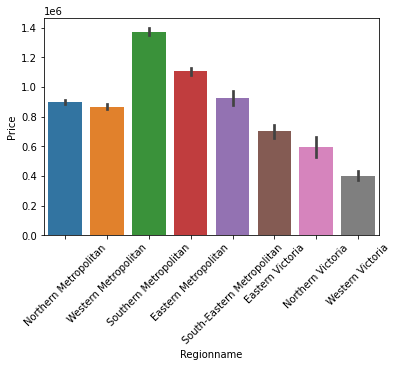

In [ ]:
sns.barplot(data=df, x='Regionname', y='Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
price_region = df.groupby(by='Regionname', as_index=False).mean()[['Regionname','Price']].sort_values(by='Price', ascending=False)
price_region

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


# Tampilkan visualisai rata-rata harga rumah berdasarkan Region Name!


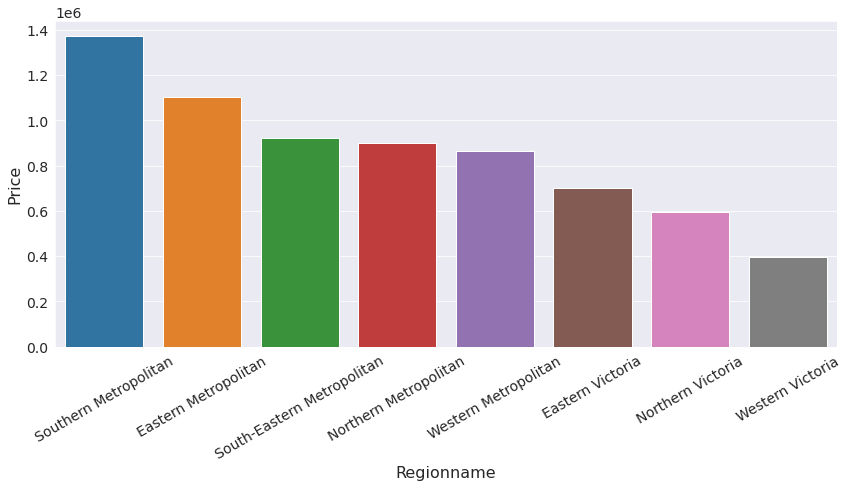

In [ ]:
# Barplot

# membandingkan mean
sns.barplot(data=price_region, x='Regionname', y='Price')
plt.xticks(rotation=30);

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 2160x1080 with 0 Axes>

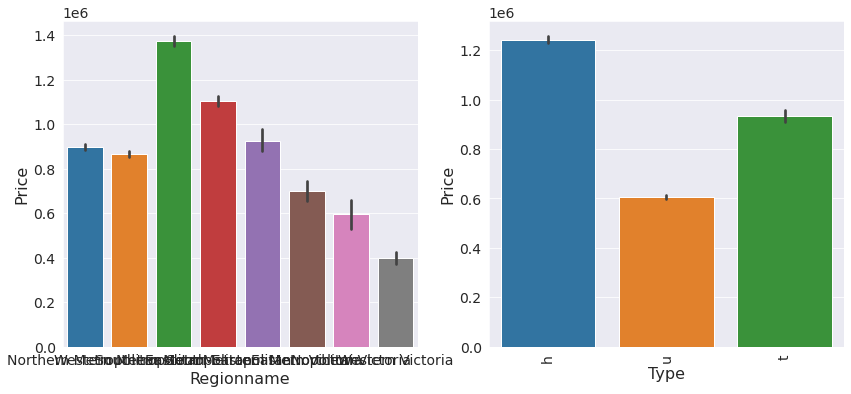

In [ ]:
plt.figure(figsize=(30,15))
fig, axes = plt.subplots(1,2)

sns.barplot(data=df, x='Regionname', y='Price', ax=axes[0])
plt.xticks(rotation=90)

sns.barplot(data=df, x='Type', y='Price', ax=axes[1])


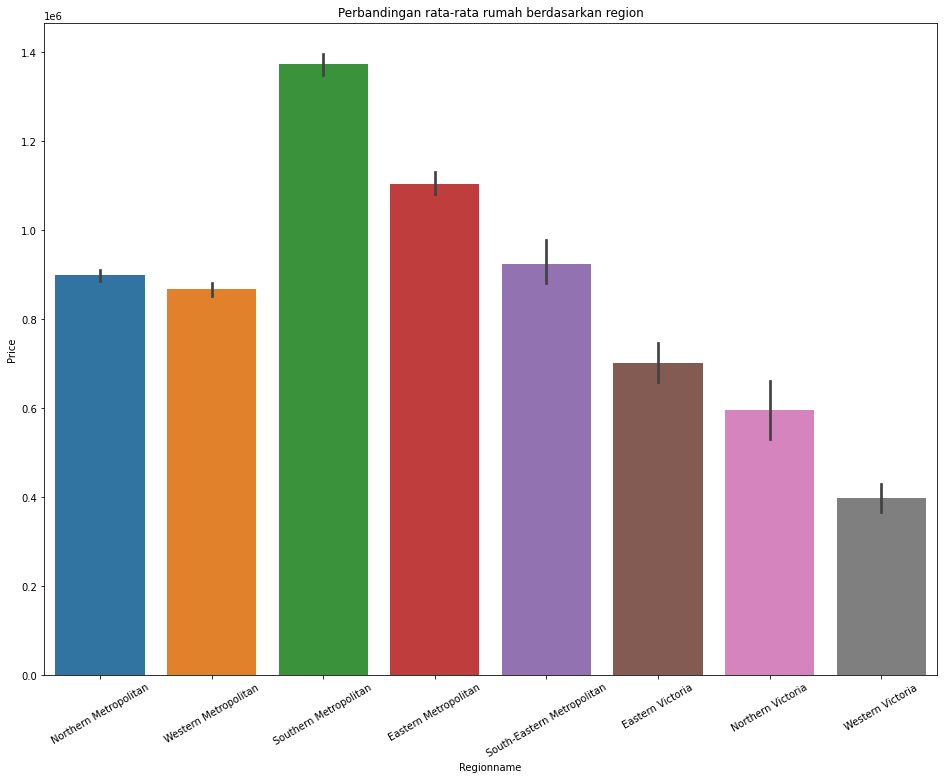

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x='Regionname', y='Price', data=df, estimator=np.mean)
plt.title('Perbandingan rata-rata rumah berdasarkan region', size=12)
plt.xticks(rotation=30)
plt.show()

# **No.3**

# Tampilkan visualisasi yang menggambarkan jumlah rumah untuk tiap tipe rumah (Type)!

1. https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

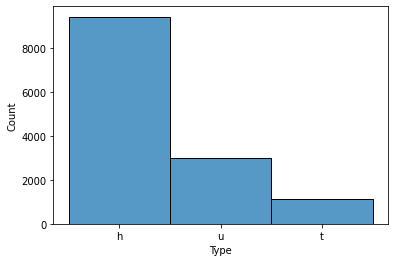

In [ ]:
sns.histplot(df['Type'])
plt.show()

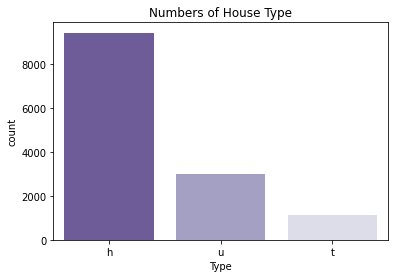

In [ ]:
ax = sns.countplot(x=df['Type'],palette='Purples_r')
ax.set_title('Numbers of House Type')
plt.show()

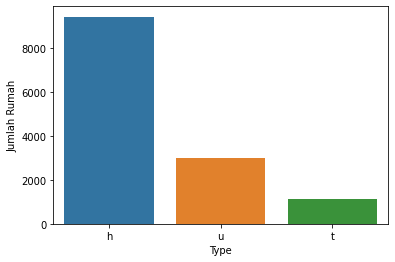

In [ ]:
# Jumlah rumah untuk tiap tipe

sns.countplot(data=df, x='Type')
plt.ylabel('Jumlah Rumah');

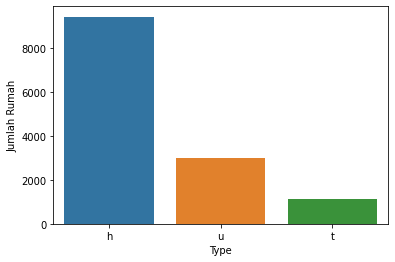

In [ ]:
sns.barplot(data=df, x='Type', y='Price', estimator=len)
plt.ylabel('Jumlah Rumah');


# **No.4**

# Tampilkan visualisasi yang menggambarkan hubungan antara variabel 'Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt'
# Variabel apa yang memiliki korelasi paling kuat dengan harga rumah (Price)?


1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
1. https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
for i in ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']:
    pvalue = (shapiro(df_car[i]))[-1]
    print(f'pvalue of {i}   \t =  {pvalue:.5f}')

In [ ]:
df_corr = df[['Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt']].corr('spearman')
df_corr

,Rooms,Price,Distance,BuildingArea,YearBuilt
Rooms,1.000000,0.539886,0.351416,0.775193,-0.072058
Price,0.539886,1.000000,-0.129990,0.631425,-0.368080
Distance,0.351416,-0.129990,1.000000,0.287116,0.228634
BuildingArea,0.775193,0.631425,0.287116,1.000000,0.003002
YearBuilt,-0.072058,-0.368080,0.228634,0.003002,1.000000


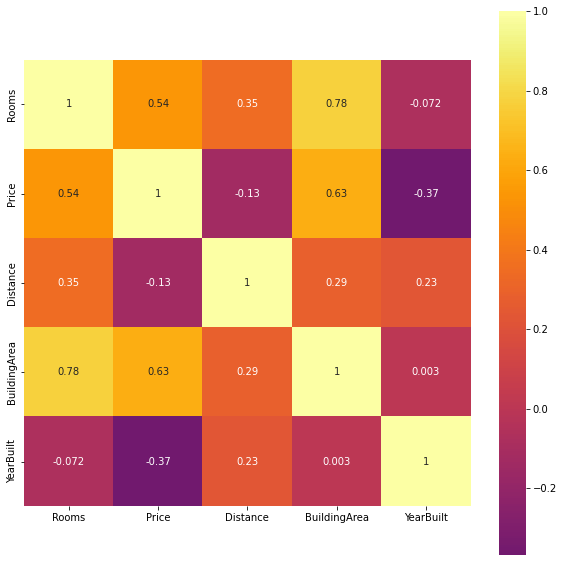

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_corr, annot=True, center=0, square=True, cmap="inferno");

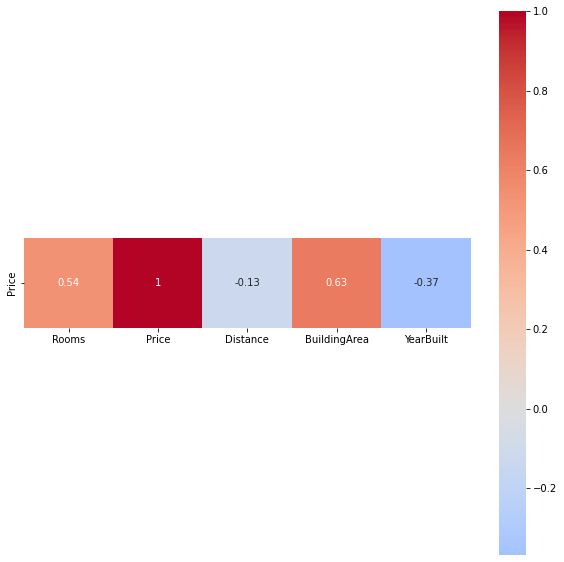

In [ ]:
# variabel yang paling berkorelaasi dengan Price adalah Building Area
plt.figure(figsize = (10,10))
sns.heatmap(df_corr.loc[['Price']], annot=True, center=0, square=True, cmap="coolwarm");

1. https://seaborn.pydata.org/generated/seaborn.pairplot.html

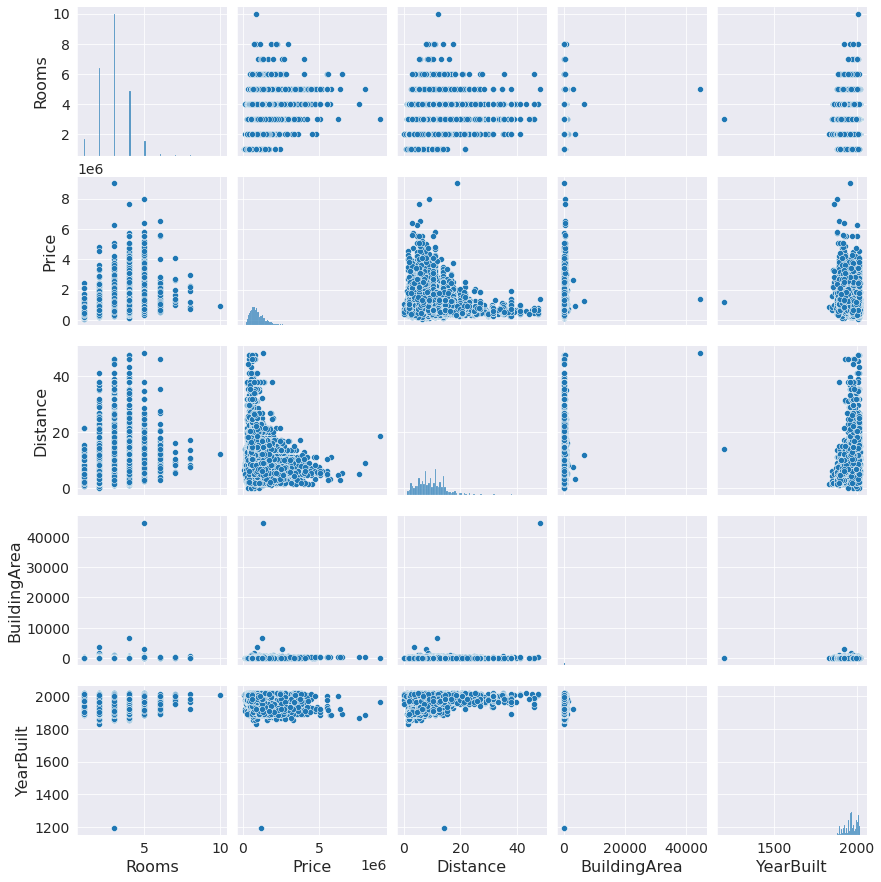

In [ ]:
sns.pairplot(df[['Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt']])

# **No.5**

# Tampilkan visualisasi yang menggambarkan korelasi antara variabel BuildingArea dan Price!
# Sebelum divisualisasikan, hapus dahulu (sementara) rumah dengan Building Area yang lebih dari 2000 m2 (karena dianggap sebagai outlier)  

1. https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:
# Correlation
df.corr('spearman')['Price']['BuildingArea']

0.6314247475827348

In [ ]:
# outlier
outlier = df[df['BuildingArea']>2000].index

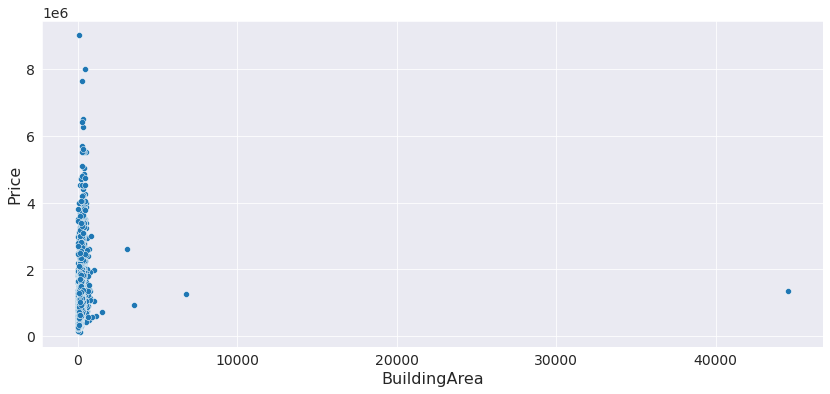

In [ ]:
sns.scatterplot(data=df, x='BuildingArea', y='Price');

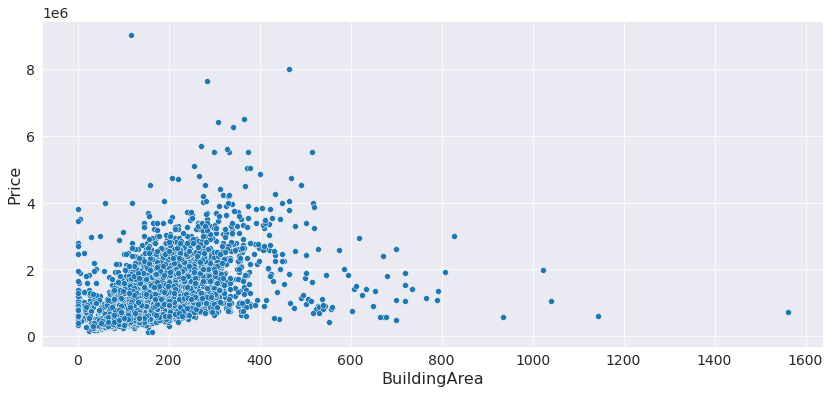

In [ ]:
sns.scatterplot(data=df.drop(index=outlier), x='BuildingArea', y='Price');

In [ ]:
df_1 = df.copy()

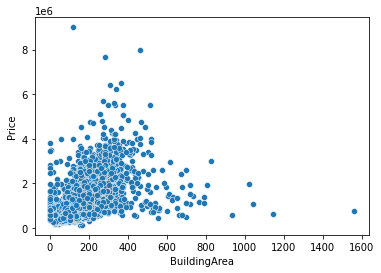

In [ ]:
df_1.drop(df_1[df_1['BuildingArea'] >= 2000].index, inplace = True)
df_1
sns.scatterplot(x = df_1['BuildingArea'], y = df_1['Price'])
plt.show()


# **No.6**

# Dari visualisasi nomor sebelumnya, tambahkan variabel Type (tipe rumah) ke dalam visualisasi
# sehingga korelasi antara luas bangunan (Buliding Area) dan harga rumah (Price) juga dapat diobservasi berdasarkan tipenya (Type)  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

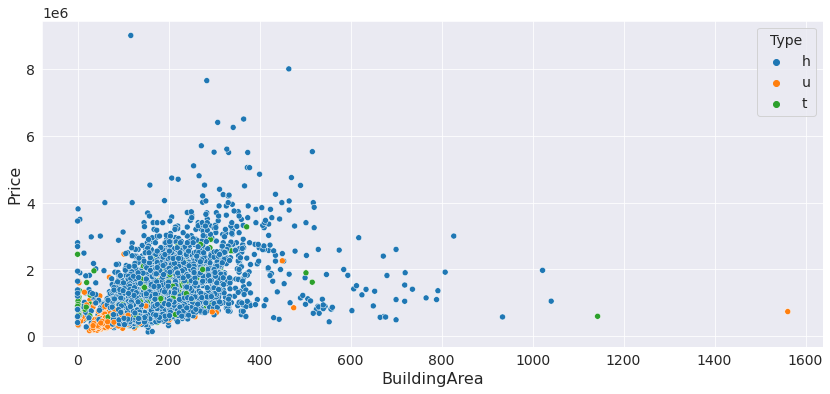

In [ ]:
sns.scatterplot(data=df.drop(index=outlier), x='BuildingArea', y='Price', hue='Type');

# h - house,cottage,villa, semi,terrace
# u - unit, duplex
# t - townhouse

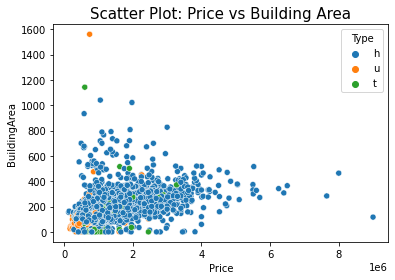

In [ ]:
sns.scatterplot(data=df, x='Price', y ='BuildingArea', hue='Type')
plt.title('Scatter Plot: Price vs Building Area', size=15)
plt.show()


# **No.7**

# Tampilkan visualisasi yang menggambarkan perubahan jumlah rumah yang dijual dari Jan 2016 - Des 2017


1. https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
1. https://seaborn.pydata.org/generated/seaborn.lineplot.html
1. https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [ ]:
# Ubah column Date dari object ke datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

Text(0.5, 1.0, 'Perubahan Jumlah Rumah yang Dijual Jan 2016-Des 2017')

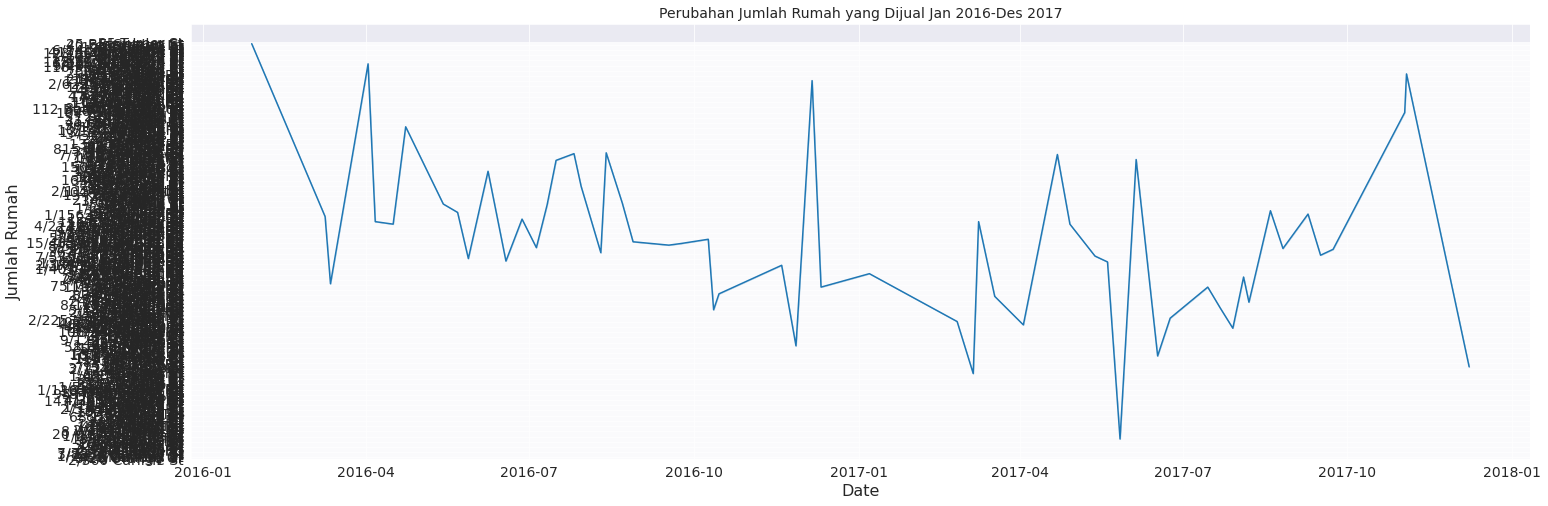

In [ ]:
plt.figure(figsize=(24,8))

sns.lineplot(data=df, x='Date', y='Address', estimator=len)

plt.ylabel('Jumlah Rumah')
plt.title('Perubahan Jumlah Rumah yang Dijual Jan 2016-Des 2017')

In [ ]:
# ambil bulan dan tahunnya saja
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').apply(lambda x: str(x))
df['Month']

0        2016-03
1        2016-04
2        2017-04
3        2017-04
4        2016-04
          ...   
13575    2017-08
13576    2017-08
13577    2017-08
13578    2017-08
13579    2017-08
Name: Month, Length: 13580, dtype: object

In [ ]:
# Jumlah rumah yang dijual per bulan (Jan 2016 - Des 2017)
df_monthly_price = df.groupby('Month', as_index=False).count()[['Month','Price']].rename(columns={'Price':'Number of House'})
df_monthly_price

,Month,Number of House
0,2016-01,2
1,2016-03,496
2,2016-04,558
3,2016-05,654
4,2016-06,626
5,2016-07,885
6,2016-08,813
7,2016-09,482
8,2016-10,854
9,2016-11,628


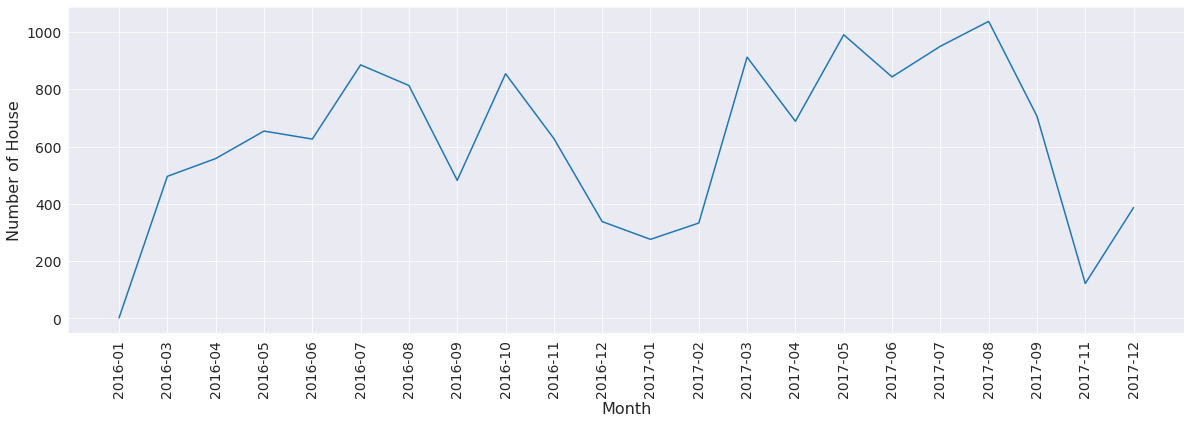

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_monthly_price, x='Month', y='Number of House')
plt.xticks(rotation=90);

In [ ]:
df_2 = df.copy()

In [ ]:
df.drop(df[df['Date'] > '31/12/2017'].index, inplace = True)
df.drop(df[df['Date'] < '1/1/2016'].index, inplace = True)
sns.lineplot(x = df['Date'], y = df['Propertycount'])


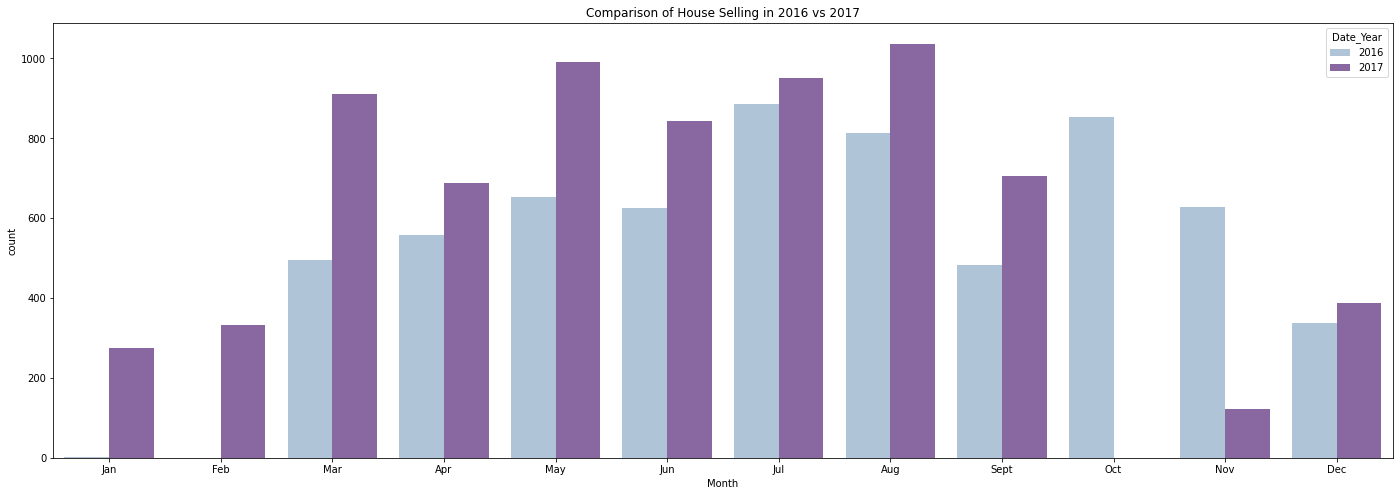

In [ ]:
df['Date_Year'] = pd.DatetimeIndex(df['Date']).year
df['Date_Month'] = pd.DatetimeIndex(df['Date']).month
df_1617 = df[(df['Date_Year'] == 2016) | (df['Date_Year']==2017)]
# df_1617.head()
plt.figure(figsize=(24,8))
ax = sns.countplot(data=df_1617, x='Date_Month',hue='Date_Year',palette='BuPu')
ax.set_title('Comparison of House Selling in 2016 vs 2017')
ax.set_xlabel('Month')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()


# **No.8**

# Tampilkan visualisasi yang menggambarkan perbandingan dari persebaran harga rumah (Price) berdasarkan tipe rumah (Type)!
# Rumah di harga berapa untuk sebuah rumah bertipe "t" (townhouse) bisa dikatakan sebagai outlier?

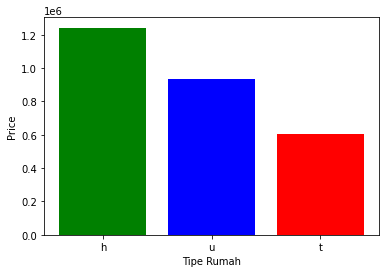

In [ ]:
df2 = df[['Price', 'Type']].groupby(['Type']).mean()
x = df['Type'].unique().tolist()
y = df2['Price']

plt.figure(figsize = (6,4))
plt.bar(x, y, color=['green', 'blue', 'red'])
plt.xlabel('Tipe Rumah')
plt.ylabel('Price')
plt.show()


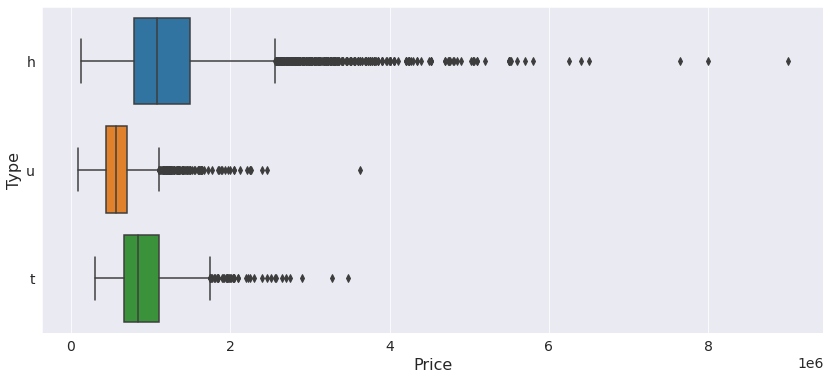

In [ ]:
sns.boxplot(x=df['Price'], y='Type', data=df)

In [ ]:
df_type_t = df[df['Type']=='t'][['Price']]
df_type_t

,Price
21,900000.0
38,840000.0
42,700000.0
48,450000.0
56,700000.0
...,...
13437,655000.0
13485,1655000.0
13504,1035000.0
13521,2455000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


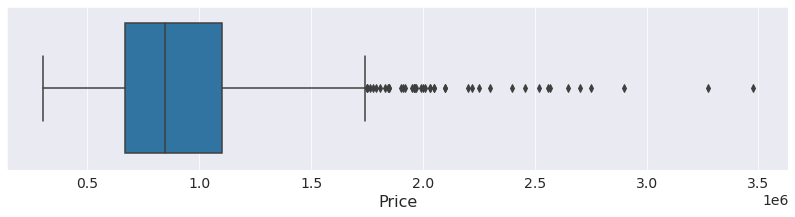

In [ ]:
plt.figure(figsize=(14,3))
sns.boxplot(df_type_t['Price'])

In [ ]:
q1 = df_type_t['Price'].quantile(0.25)
q3 = df_type_t['Price'].quantile(0.75)

IQR = q3 -q1
IQR

upper = q3 + 1.5*IQR # batas atas
lower = q1 - 1.5*IQR # batas bawah

print(f'Sebuah rumah bertipe "t" bisa dikatakan sebagai outlier jika harganya > {upper} atau < {lower}')

Sebuah rumah bertipe "t" bisa dikatakan sebagai outlier jika harganya > 1749750.0 atau < 22150.0


# **No.9**

# Tampilkan lokasi rumah paling mahal!
# Tandai dengan dengan icon pin warna merah, ketika Anda hover mouse ke lokasi akan keluar tulisan 'Rumah' dan kalau diklik akan keluar alamatnya (Address)!


1. https://python-visualization.github.io/folium/
1. https://python-visualization.github.io/folium/modules.html#module-folium.map
1. https://python-visualization.github.io/folium/quickstart.html

In [ ]:
! pip install folium --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.6 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [ ]:
import folium

In [ ]:
df[df['Price'] == df['Price'].max()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,...,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0


In [ ]:
folium.__version__

'0.12.1.post1'

In [ ]:
# Buka peta pada lokasi dgn koordinat tertentu
rumah = folium.Map(location=[-37.93168, 145.16126], zoom_start=15)

# untuk popup
iframe = folium.IFrame('Address: 35 Bevis St')
myPopup = folium.Popup(iframe,min_width=125, max_width=0) #

# untuk icon
myIcon = folium.Icon(color='red', icon='info-sign')

# Kasih keterangan
folium.Marker(
    location  = [-37.93168, 145.16126],
    popup     = myPopup,
    tooltip   = 'Rumah',
    icon      = myIcon

).add_to(rumah)

rumah

In [ ]:
df['Price'].idxmax()

12094

In [ ]:
df.iloc[12094]

Suburb                             Mulgrave
Address                         35 Bevis St
Rooms                                     3
Type                                      h
Price                             9000000.0
Method                                   PI
SellerG                                Hall
Date                             29/07/2017
Distance                               18.8
Postcode                             3170.0
Bedroom2                                3.0
Bathroom                                1.0
Car                                     1.0
Landsize                              744.0
BuildingArea                          117.0
YearBuilt                            1960.0
CouncilArea                          Monash
Lattitude                         -37.93168
Longtitude                        145.16126
Regionname       South-Eastern Metropolitan
Propertycount                        7113.0
Date_Year                              2017
Date_Month                      

In [ ]:
Mel_map = folium.Map(location= [-37.940935, 145.246457], zoom_start=10)

#Marker
#House

folium.Marker([-37.93168, 145.16126],
                popup='<b>Rumah<b>',
                tooltip='35 Bevis St',
                icon=folium.Icon(color='red')
                # color=['red']
                ).add_to(Mel_map)

Mel_map